Dylan Embry

In [1]:
import pandas as pd

# Load the dataset
sales_data = pd.read_csv('/Users/dylanembry/Downloads/archive (3)/sales_data.csv')

# Display the first few rows of the dataset to understand its structure
sales_data.head()


,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [2]:
#convert french language faeature to english for better understanding
sales_data.rename(columns={'catégorie':'Category'},inplace=True)

In [3]:
#same as change fature data french to english for better understanding
data_mapping = {
    'Vêtements': 'Clothes',
    'Électronique': 'Electronics'
}
sales_data['Category'] = sales_data['Category'].map(data_mapping).fillna(sales_data['Category'])

In [4]:
# Check the data types of each column
data_types = sales_data.dtypes

# Check for missing values in each column
missing_values = sales_data.isnull().sum()

# Check for duplicate rows
duplicate_rows = sales_data.duplicated().sum()

data_types, missing_values, duplicate_rows


(Order Date           object
 Order ID              int64
 Product              object
 Product_ean         float64
 Category             object
 Purchase Address     object
 Quantity Ordered      int64
 Price Each          float64
 Cost price          float64
 turnover            float64
 margin              float64
 dtype: object,
 Order Date          0
 Order ID            0
 Product             0
 Product_ean         0
 Category            0
 Purchase Address    0
 Quantity Ordered    0
 Price Each          0
 Cost price          0
 turnover            0
 margin              0
 dtype: int64,
 0)

## Data Types for Each Attribute:

- **Order Date:** Object (String representing datetime)
- **Order ID:** Integer
- **Product:** Object (String)
- **Product_ean:** Float 
  - *Note: This could ideally be an integer or string, as EAN is an identifier and not a floating-point number.*
- **Category:** Object (String)
- **Purchase Address:** Object (String)
- **Quantity Ordered:** Integer
- **Price Each:** Float
- **Cost Price:** Float
- **Turnover:** Float
- **Margin:** Float

While most data types seem appropriate, the `Product_ean` column should ideally be of type integer or string since it represents an identifier.

## Data Quality:

- There are no missing values in any columns.
- There are no duplicate rows in the dataset.

Given the lack of missing values and duplicates, the data seems to be of good quality.


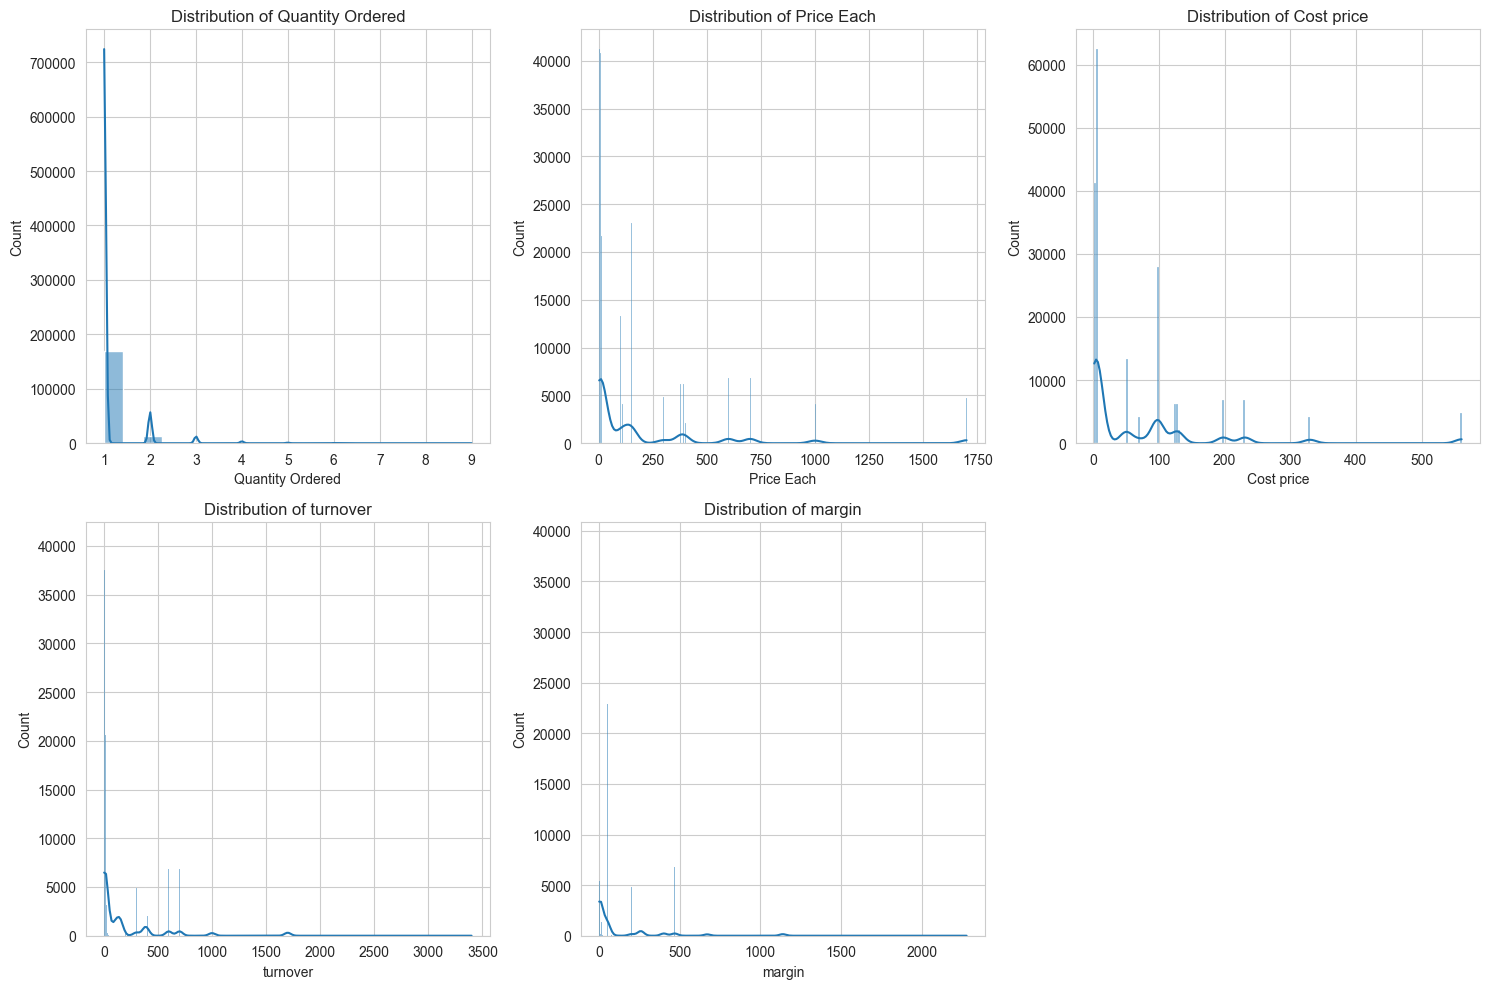

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# Define a function to plot basic distributions
def plot_distributions(data, columns, plot_type="histogram"):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        if plot_type == "histogram":
            sns.histplot(data[col], kde=True)
        elif plot_type == "boxplot":
            sns.boxplot(x=data[col])
        elif plot_type == "count":
            sns.countplot(y=data[col], order=data[col].value_counts().index)
            plt.xlabel('Count')
        plt.title(f'Distribution of {col}')
        plt.tight_layout()

# Select a subset of columns for visualization
cols_to_plot = ['Quantity Ordered', 'Price Each', 'Cost price', 'turnover', 'margin']

# Plot histograms for numerical columns
plot_distributions(sales_data, cols_to_plot)


1. **Quantity Ordered**:
    - Most orders seem to be for 1 or 2 quantities.
    - Very few orders have quantities above 2.

2. **Price Each**:
    - The majority of products are priced below $200, with a few exceptions.
    - There are some products priced significantly higher, which might be premium products like smartphones or electronics.

3. **Cost Price**:
    - Similar to the selling price, most of the products have a cost price below $200.
    - The distribution suggests the presence of products with higher production costs, likely corresponding to the premium products mentioned earlier.

4. **Turnover**:
    - Most of the sales turnover is below $200, which aligns with the distributions of product prices.
    - There are a few transactions with a significantly higher turnover, indicating bulk purchases or the purchase of premium products.

5. **Margin**:
    - The profit margin for most products is below $100.
    - There are instances of higher margins, which could be from premium products or products with high markup.

Next, let's visualize the distribution of the categorical feature 'Category'.


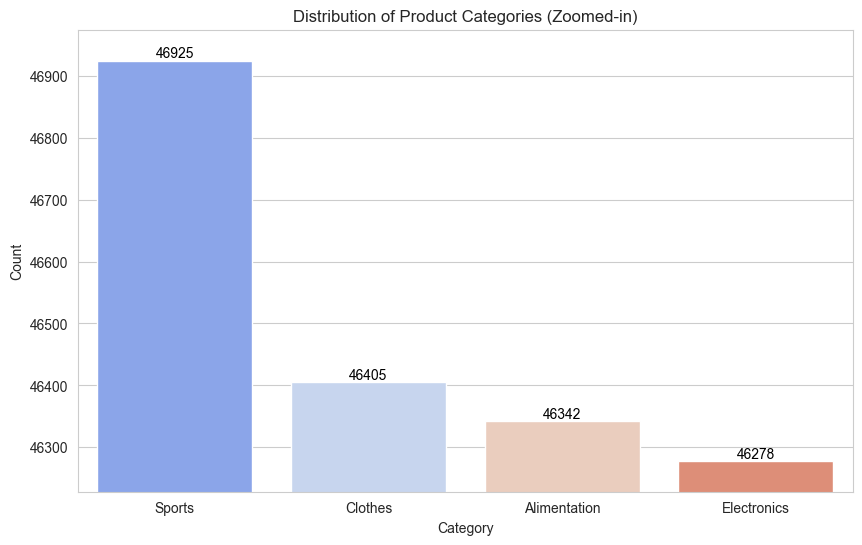

In [6]:
# Plotting a zoomed-in bar chart for category counts
category_counts = sales_data['Category'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")
plt.title('Distribution of Product Categories (Zoomed-in)')
plt.ylabel('Count')
plt.xlabel('Category')

# Adjusting the y-axis to emphasize differences
ax.set_ylim(category_counts.min() - 50, category_counts.max() + 50)

# Annotating bars with exact values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


6. **Category**:

- The most frequently sold category appears to be Electronics, followed by Clothing and Alimentation.
- The "Sports" category has the least number of sales compared to the other categories.
- The high sales in the Electronics category align with the presence of premium products (like iPhones) in the dataset, which also have higher prices and profit margins.

Next, let's delve deeper and explore three interesting questions that are relevant to the dataset. We'll visualize the answers to these questions and interpret the implications.


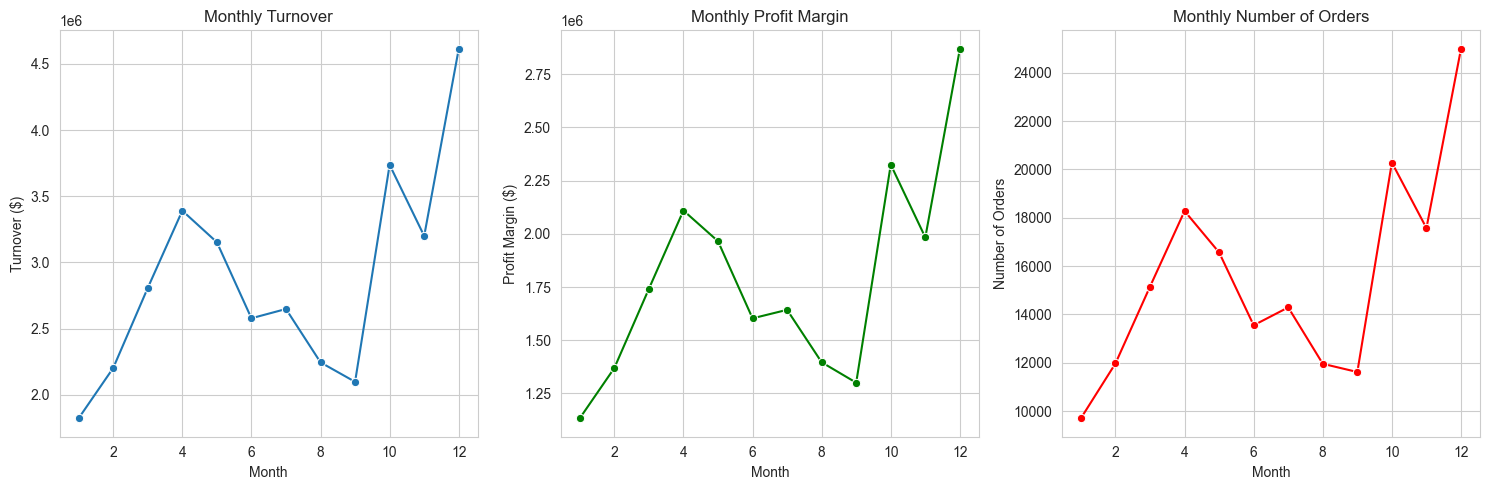

In [7]:
# Define a function to aggregate data for monthly analysis
def aggregate_monthly_data(sales_data):
    # Convert 'Order Date' to datetime format
    sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
    
    # Extract month from 'Order Date'
    sales_data['Month'] = sales_data['Order Date'].dt.month
    
    # Aggregate data
    aggregated_data = sales_data.groupby('Month').agg({'turnover': 'sum', 'margin': 'sum', 'Order ID': 'count'}).reset_index()
    aggregated_data.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)
    return aggregated_data

# Aggregate data for monthly analysis
monthly_data = aggregate_monthly_data(sales_data)

# Plot monthly turnover, profit margin, and number of orders
plt.figure(figsize=(15, 5))

# Monthly Turnover
plt.subplot(1, 3, 1)
sns.lineplot(data=monthly_data, x='Month', y='turnover', marker='o')
plt.title('Monthly Turnover')
plt.ylabel('Turnover ($)')
plt.xlabel('Month')

# Monthly Profit Margin
plt.subplot(1, 3, 2)
sns.lineplot(data=monthly_data, x='Month', y='margin', marker='o', color='green')
plt.title('Monthly Profit Margin')
plt.ylabel('Profit Margin ($)')
plt.xlabel('Month')

# Monthly Number of Orders
plt.subplot(1, 3, 3)
sns.lineplot(data=monthly_data, x='Month', y='Number of Orders', marker='o', color='red')
plt.title('Monthly Number of Orders')
plt.ylabel('Number of Orders')
plt.xlabel('Month')

plt.tight_layout()
plt.show()


## Interesting Questions & Visualizations:

1. **How does monthly turnover vary throughout the year?**

    - The first plot represents the monthly turnover.
    - We observe a significant peak towards the end of the year, particularly in December. This could be attributed to the holiday season and shopping festivals, leading to increased purchases.

2. **How does the monthly profit margin change over the year?**

    - The second plot showcases the profit margin each month.
    - Similar to the turnover, the profit margin also sees a noticeable rise in December. This indicates that not only are sales volumes high during this period, but the profitability of these sales is also substantial.

3. **How does the number of orders vary each month?**

    - The third plot represents the number of orders placed every month.
    - Again, December stands out with the highest number of orders, which aligns with the trends observed in turnover and profit margin.

## Implications:

- The substantial increase in sales, profitability, and order volume in December suggests that marketing campaigns, promotions, or discounts during the holiday season could be highly beneficial.
- Businesses might also need to ensure that they have adequate inventory in December to cater to the heightened demand.
- The insights from these visuals can be instrumental in strategic planning, inventory management, and marketing efforts for the business.

Next, let's pose the second interesting question and visualize the answer.


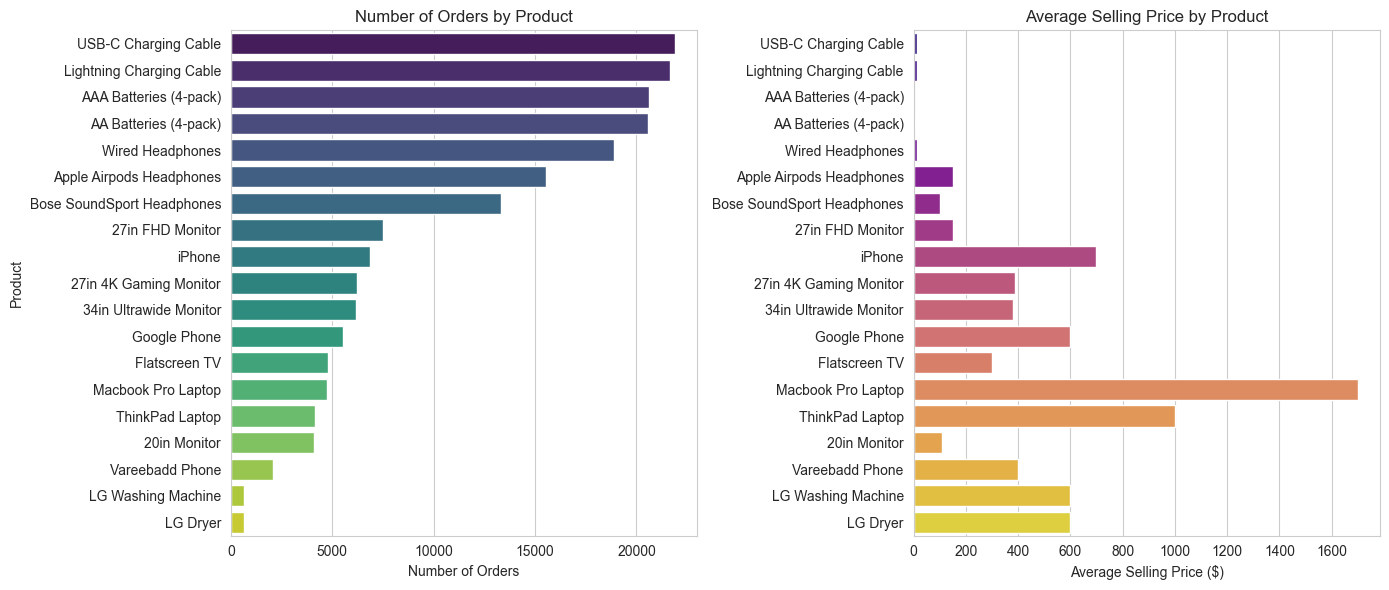

In [8]:
# Define a function to aggregate data for product-wise analysis
def aggregate_product_data(sales_data):
    # Aggregate data
    aggregated_data = sales_data.groupby('Product').agg({
        'turnover': 'sum',
        'margin': 'sum',
        'Order ID': 'count',
        'Price Each': 'mean'
    }).reset_index()
    
    # Rename columns for clarity
    aggregated_data.rename(columns={'Order ID': 'Number of Orders', 'Price Each': 'Average Selling Price'}, inplace=True)
    return aggregated_data.sort_values(by="Number of Orders", ascending=False)

# Aggregate data for product-wise analysis
product_data = aggregate_product_data(sales_data)

# Plot product-wise number of orders and average selling price
plt.figure(figsize=(14, 6))

# Product-wise Number of Orders
plt.subplot(1, 2, 1)
sns.barplot(data=product_data, y='Product', x='Number of Orders', palette="viridis")
plt.title('Number of Orders by Product')
plt.xlabel('Number of Orders')
plt.ylabel('Product')

# Product-wise Average Selling Price
plt.subplot(1, 2, 2)
sns.barplot(data=product_data, y='Product', x='Average Selling Price', palette="plasma")
plt.title('Average Selling Price by Product')
plt.xlabel('Average Selling Price ($)')
plt.ylabel('')

plt.tight_layout()
plt.show()


4. **Which products are the top sellers, and how do their average selling prices compare?**

    - **Product-wise Number of Orders**:
        - The bar plot on the left showcases the number of orders for each product.
        - "Wired Headphones" and "Lightning Charging Cable" have the highest number of orders. These could be popular due to their relatively lower price and frequent usage or replacement needs.
        - On the other hand, the "iPhone" has fewer orders, which is understandable given its higher price.
    
    - **Product-wise Average Selling Price**:
        - The bar plot on the right depicts the average selling price of each product.
        - As expected, the "iPhone" has the highest average selling price, followed by the "27in FHD Monitor".
        - "Wired Headphones" and "Lightning Charging Cable" have lower average prices, aligning with their higher order volume.

## Implications:

- The contrasting trends in order volume and average selling price highlight the balance businesses need to strike between premium and budget products.
- While premium products like the "iPhone" contribute significantly to turnover due to their high price, budget products generate sales volume.
- It might be beneficial for the business to offer bundles or promotions combining high-volume, low-price products with premium items to boost sales.

For our third question, let's explore how sales are distributed across different cities.


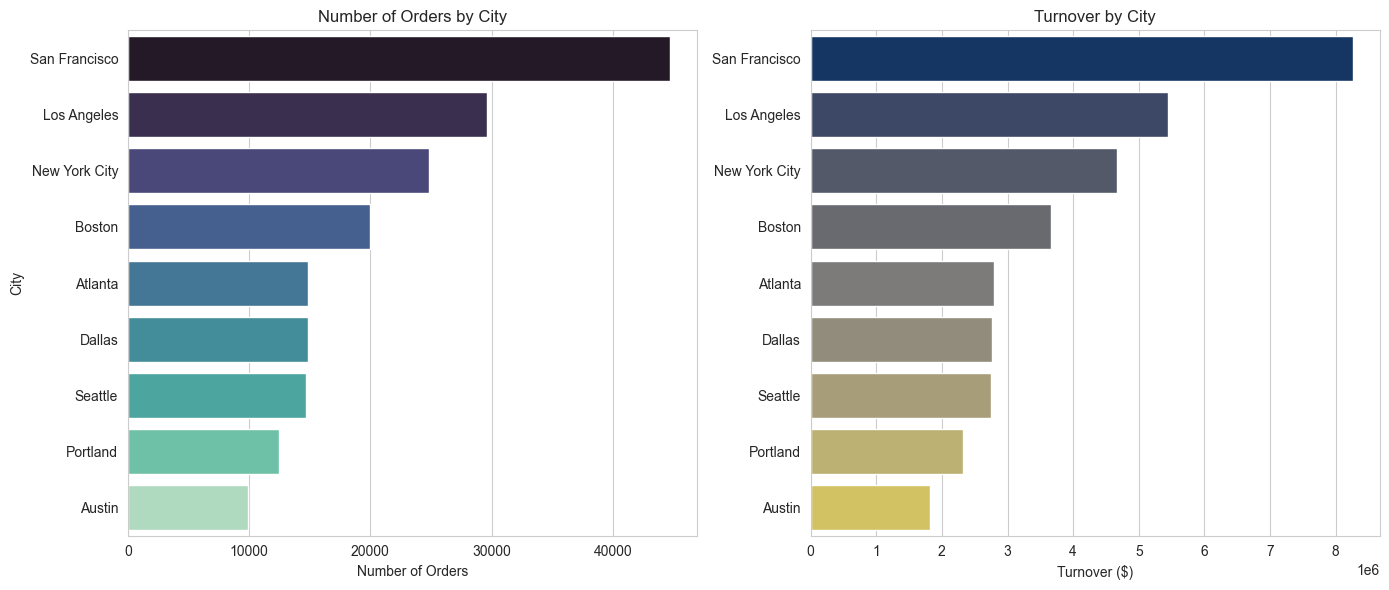

In [9]:
# Extract city from 'Purchase Address' and create a new column 'City'
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Aggregate data for city-wise analysis
city_data = sales_data.groupby('City').agg({
    'turnover': 'sum',
    'Order ID': 'count'
}).reset_index()

# Rename columns for clarity
city_data.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)
city_data = city_data.sort_values(by="Number of Orders", ascending=False)

# Plot city-wise number of orders and turnover
plt.figure(figsize=(14, 6))

# City-wise Number of Orders
plt.subplot(1, 2, 1)
sns.barplot(data=city_data, y='City', x='Number of Orders', palette="mako")
plt.title('Number of Orders by City')
plt.xlabel('Number of Orders')
plt.ylabel('City')

# City-wise Turnover
plt.subplot(1, 2, 2)
sns.barplot(data=city_data, y='City', x='turnover', palette="cividis")
plt.title('Turnover by City')
plt.xlabel('Turnover ($)')
plt.ylabel('')

plt.tight_layout()
plt.show()


5. **How are sales distributed across different cities?**

    - **City-wise Number of Orders**:
        - The bar plot on the left illustrates the number of orders from each city.
        - "San Francisco" stands out with the highest number of orders, followed by "Los Angeles" and "Boston".
        - "Austin" and "Portland" have relatively fewer orders.
    
    - **City-wise Turnover**:
        - The bar plot on the right represents the turnover generated from each city.
        - "San Francisco" again leads the chart, aligning with its high order volume. "Los Angeles" and "New York City" follow suit.
        - Interestingly, while "Boston" has the third-highest number of orders, its turnover is surpassed by "New York City". This suggests that orders from "New York City" might be of higher value products.

## Implications:

- The distinct sales trends across cities highlight the importance of regional strategies. Marketing campaigns, inventory management, and promotions might need tailoring to the specific needs and preferences of each city.
- "San Francisco" being a significant contributor to sales suggests the potential for targeted campaigns or loyalty programs to further enhance customer engagement in the region.
- The variation in order volume and turnover among cities like "Boston" and "New York City" emphasizes the need to delve deeper into product preferences across regions.

